# _Foundations of Applied Mathematics_ Labs: Volume 1

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi, cos, sin

# 2. Linear Systems


### Gaussian Elimination

In [10]:
import numpy as np

A = np.array([[1, 1, 1, 1],
              [1, 4, 2, 3],
              [4, 7, 8, 9]], dtype=np.float)

# Reduce the 0th column to zeros below the diagonal.
A[1,0:] -= (A[1,0] / A[0,0]) * A[0]
A[2,0:] -= (A[2,0] / A[0,0]) * A[0]

# Reduce the 1st column to zeros below the diagonal.
A[2,1:] -= (A[2,1] / A[1,1]) * A[1,1:]
print(A)

[[1. 1. 1. 1.]
 [0. 3. 1. 2.]
 [0. 0. 3. 3.]]


_Gaussian elimination is not numerically stable. The NumPy routines that employ row reduction use several tricks to reduce round-off error._

**Problem 1.** Write a function that reduces an arbitrary square matrix $A$ to REF.
You may assume that $A$ is invertible and that a $0$ will never appear on the main diagonal (so only use type III row reductions, not type II).
Avoid operating on entries that you know will be $0$ before and after a row operation. Use at most two nested loops.

Test your function with small test cases that you can check by hand.
Consider using `np.random.randint()` to generate a few manageable tests cases.

**Solution 1.**

### LU Decomposition

**Problem 2.** Write a function that finds the LU decomposition of a square matrix.
You may assume that the decomposition exists and requires no row swaps.

**Solution 2.**

### Forward and Backward Substitution

**Problem 3.** Write a function that, given $A$ and $b$, solves the square linear system $Ax = b$. Use the function from Problem 2 to compute $L$ and $U$, then use (2.1) and (2.2) to solve for $y$, then $x$. You may again assume that no row swaps are required ($P = I$ in this case).

**Solution 3.**

## SciPy

In [11]:
import scipy as sp
hasattr(sp, "stats")            # The stats module isn't loaded yet.

False

In [12]:
from scipy import stats         # Import stats explicitly. Access it
hasattr(sp, "stats")            # with 'stats' or 'sp.stats'.

True

### Linear Algebra

In [13]:
from scipy import linalg as la

# Make a random matrix and a random vector.
A = np.random.random((1000,1000))
b = np.random.random(1000)

# Compute the LU decomposition of A, including pivots.
L, P = la.lu_factor(A)

# Use the LU decomposition to solve Ax = b.
x = la.lu_solve((L,P), b)

# Check that the solution is legitimate.
np.allclose(A @ x, b)

True

**Problem 4.** Write a function that times different `scipy.linalg` functions for solving square linear systems.

For various values of $n$, generate a random $n \times n$ matrix $A$ and a random $n$-vector $b$ using `np.random.random()`.
Time how long it takes to solve the system $Ax = b$ with each of the following approaches:

1. Invert $A$ with `la.inv()` and left-multiply the inverse to $b$.
1. Use `la.solve()`.
1. Use `la.lu_factor()` and `la.lu_solve()` to solve the system with the LU decomposition.
1. Use `la.lu_factor()` and `la.lu_solve()`, but only time `la.lu_solve()` (not the time it takes to do the factorization with `la.lu_factor()`).

Plot the system size $n$ versus the execution times.
Use log scales if needed.

**Solution 4.**

### Sparse Matrices

#### Coordinate Format:

In [14]:
from scipy import sparse

# Define the rows, columns, and values separately.
rows = np.array([0, 1, 0])
cols = np.array([0, 1, 1])
vals = np.array([3, 5, 2])
A = sparse.coo_matrix((vals, (rows,cols)), shape=(3,3))
print(A)

  (0, 0)	3
  (1, 1)	5
  (0, 1)	2


In [15]:
# The toarray() method casts the sparse matrix as a NumPy array.
# Note that this method forfeits all sparsity-related optimizations.
print(A.toarray()) 

[[3 2 0]
 [0 5 0]
 [0 0 0]]


#### DOK and LIL Formats:

In [16]:
B = sparse.lil_matrix((2,6))
B[0,2] = 4
B[1,3:] = 9

print(B.toarray())

[[0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 9. 9. 9.]]


#### DIA Format:

In [17]:
# Use sparse.diags() to create a matrix with diagonal entries.
diagonals = [[1,2],[3,4,5],[6]]     # List the diagonal entries.
offsets = [-1,0,3]                  # Specify the diagonal they go on.
print(sparse.diags(diagonals, offsets, shape=(3,4)).toarray())

[[3. 0. 0. 6.]
 [1. 4. 0. 0.]
 [0. 2. 5. 0.]]


In [18]:
# If all of the diagonals have the same entry, specify the entry alone.
A = sparse.diags([1,3,6], offsets, shape=(3,4))
print(A.toarray())

[[3. 0. 0. 6.]
 [1. 3. 0. 0.]
 [0. 1. 3. 0.]]


In [19]:
# Modify a diagonal with the setdiag() method.
A.setdiag([4,4,4], 0)
print(A.toarray())

[[4. 0. 0. 6.]
 [1. 4. 0. 0.]
 [0. 1. 4. 0.]]


#### BSR Format:

In [20]:
# Use sparse.bmat() to create a block matrix. Use 'None' for zero blocks.
A = sparse.coo_matrix(np.ones((2,2)))
B = sparse.coo_matrix(np.full((2,2), 2.))
print(sparse.bmat([[  A , None,  A  ],
                   [None,  B  , None]], 
                  format='bsr').toarray())

[[1. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 1.]
 [0. 0. 2. 2. 0. 0.]
 [0. 0. 2. 2. 0. 0.]]


In [21]:
# Use sparse.block_diag() to construct a block diagonal matrix.
print(sparse.block_diag((A,B)).toarray())

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 2. 2.]
 [0. 0. 2. 2.]]


NOTE: Visualizing a sparse matrix

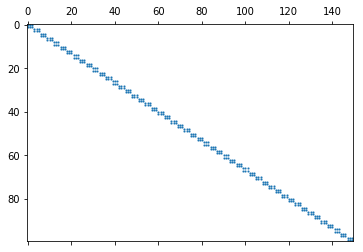

In [22]:
from matplotlib import pyplot as plt

# Construct and show a matrix with 50 2x3 diagonal blocks.
B = sparse.coo_matrix([[1,3,5],[7,9,11]])
A = sparse.block_diag([B]*50)
plt.spy(A, markersize=1)
plt.show()

**Problem 5.** Let $I$ be the $n\times n$ identity matrix, and define

$A =\begin{bmatrix}
B & I &      &        & \\
I & B &  I   &        & \\
  & I & \ddots & \ddots & \\
  &   & \ddots & \ddots & I \\
  &   &        &    I   & B
\end{bmatrix}$, $\quad$
$B = \begin{bmatrix}
-4 &  1 &      &        & \\
 1 & -4 &  1   &        & \\
   &  1 & \ddots & \ddots & \\
   &    & \ddots & \ddots & 1 \\
   &    &        &    1   & -4
\end{bmatrix}$,

where $A$ is $n^2\times n^2$ and each block $B$ is $n\times n$.
The large matrix $A$ is used in finite difference methods for solving Laplace's equation in two dimensions, $\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2} = 0$.

Write a function that accepts an integer $n$ and constructs and returns $A$ as a sparse matrix. Use `plt.spy()` to check that your matrix has nonzero values in the correct places.

**Solution 5.**

#### Sparse Matrix Operations

In [23]:
# Initialize a sparse matrix incrementally as a lil_matrix.
A = sparse.lil_matrix((10000,10000))
for k in range(10000):
    A[np.random.randint(0,9999), np.random.randint(0,9999)] = k
A

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 9999 stored elements in LInked List format>

In [24]:
# Convert A to CSR and CSC formats to compute the matrix product AA.
Acsr = A.tocsr()
Acsc = A.tocsc()
Acsr.dot(Acsc)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 9941 stored elements in Compressed Sparse Row format>

_Note that NumPy arrays and SciPy sparse matrices have slightly different syntax._ SciPy has its own linear algebra library for sparse matrices.

In [25]:
from scipy.sparse import linalg as spla

**Problem 6.** Write a function that times regular and sparse linear system solvers.

For various values of $n$, generate the $n^2 \times n^2$ matrix $A$ described in Problem 5 and a random vector $\mathbf{b}$ with $n^2$ entries.
Time how long it takes to solve the system $A\mathbf{x} = \mathbf{b}$ with each of the following approaches:


1. Convert $A$ to CSR format and use `scipy.sparse.linalg.spsolve()` (`spla.spsolve()`).

1. Convert $A$ to a NumPy array and use `scipy.linalg.solve()` (`la.solve()`).


In each experiment, only time how long it takes to solve the system (not how long it takes to convert $A$ to the appropriate format).

Plot the system size $n^{2}$ versus the execution times.
As always, use log scales where appropriate and use a legend to label each line.


**Solution 6.**

#### Improvements on the LU Decomposition

In [27]:
A = np.zeros(3) + np.vstack(np.arange(3))
P = np.arange(3)
print(A)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [28]:
# Swap rows 1 and 2.
A[1], A[2] = np.copy(A[2]), np.copy(A[1])
P[1], P[2] = P[2], P[1]
print(A)                        # A with the new row arrangement.

[[0. 0. 0.]
 [2. 2. 2.]
 [1. 1. 1.]]


In [29]:
print(P)                        # The permutation of the rows.

[0 2 1]


In [30]:
print(A[P])                     # A with the original row arrangement.

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


# 3. The QR Decomposition

In [15]:
import numpy as np
from scipy import linalg as la

# Generate a random matrix and get its reduced QR decomposition via SciPy.
A = np.random.random((6,4))
Q,R = la.qr(A, mode="economic") # Use mode="economic" for reduced QR.
print(A.shape, Q.shape, R.shape)

(6, 4) (6, 4) (4, 4)


In [16]:
# Verify that R is upper triangular, Q is orthonormal, and QR = A.
np.allclose(np.triu(R), R)

True

In [17]:
np.allclose(Q.T @ Q, np.identity(4))

True

In [18]:
np.allclose(Q @ R, A)

True

In [19]:
sign = lambda x: 1 if x >= 0 else -1

A = np.random.random((5, 3))
Q,R = la.qr(A)                  # Get the full QR decomposition.
print(A.shape, Q.shape, R.shape)

(5, 3) (5, 5) (5, 3)


In [20]:
np.allclose(Q @ R, A)

True

In [21]:
# Generate a random matrix and get its upper Hessenberg form via SciPy.
A = np.random.random((8,8))
H, Q = la.hessenberg(A, calc_q=True)

# Verify that H has all zeros below the first subdiagonal and QHQ^T = A.
np.allclose(np.triu(H, -1), H)

True

In [22]:
np.allclose(Q @ H @ Q.T, A)

True

In [23]:
A = np.reshape(np.arange(4) + 1j*np.arange(4), (2,2))
print(A)

[[0.+0.j 1.+1.j]
 [2.+2.j 3.+3.j]]


In [24]:
print(A.T)                      # Regular transpose.

[[0.+0.j 2.+2.j]
 [1.+1.j 3.+3.j]]


In [25]:
print(A.conj().T)               # Hermitian conjugate.

[[0.-0.j 2.-2.j]
 [1.-1.j 3.-3.j]]


In [26]:
x = np.arange(2) + 1j*np.arange(2)
print(x)

[0.+0.j 1.+1.j]


In [27]:
np.dot(x, x)                    # Standard real inner product.

2j

In [29]:
np.dot(x.conj(), y)             # Standard complex inner product.

NameError: name 'y' is not defined

In [ ]:
sign = lambda x: 1 if np.real(x) >= 0 else -1

# Get the decomposition AP = QR for a random matrix A.
A = np.random.random((8,10))
Q,R,P = la.qr(A, pivoting=True)

# P is returned as a 1-D array that encodes column ordering,
# so A can be reconstructed with fancy indexing.
np.allclose(Q @ R, A[:,P])

# Generate a random orthonormal matrix and a random upper-triangular matrix.
Q, _ = la.qr(np.random.normal(size=(500,500)))
R  = np.triu(np.random.normal(size=(500,500)))

# Calculate A = QR, noting that Q and R are the EXACT QR decomposition of A.
A = Q @ R

# Use SciPy to rediscover the QR decomposition of A.
Q1, R1 = la.qr(A)

# Compare the true Q and R to the computed Q1 and R1.
print(la.norm(Q1-Q, <<ord>>=np.inf) / la.norm(Q, <<ord>>=np.inf))
print(la.norm(R1-R, <<ord>>=np.inf) / la.norm(R, <<ord>>=np.inf))

A1 = Q1 @ R1
la.norm(A1 - A, <<ord>>=np.inf) / la.norm(A, <<ord>>=np.inf)

# 4. Least Squares and Computing Eigenvalues

In [30]:
import numpy as np
from scipy.stats import linregress

# Generate some random data close to the line y = .5x - 3.
x = np.linspace(0, 10, 20)
y = .5*x - 3 + np.random.randn(20)

# Use linregress() to calculate m and b, as well as the correlation
# coefficient, p-value, and standard error. See the documentation for
# details on each of these extra return values.
a, b, rvalue, pvalue, stderr = linregress(x, y)

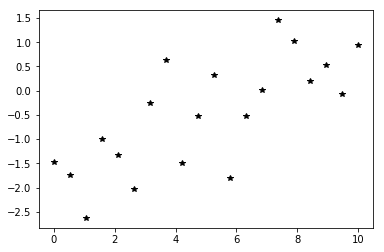

In [31]:
plt.plot(x, y, 'k*', label="Data Points")

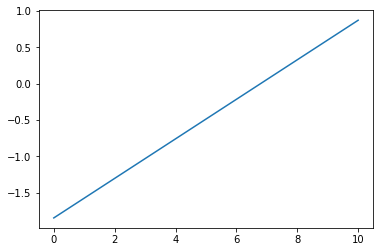

In [34]:
plt.plot(x, a*x + b, label="Least Squares Fit")

No handles with labels found to put in legend.


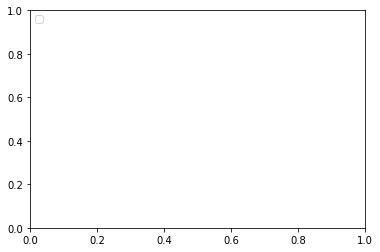

In [35]:
plt.legend(loc="upper left")

In [36]:
plt.show()

In [37]:
print(np.vander([2, 3, 5], 2))

[[2 1]
 [3 1]
 [5 1]]


In [38]:
print(np.vander([2, 3, 5, 4], 3))

[[ 4  2  1]
 [ 9  3  1]
 [25  5  1]
 [16  4  1]]


In [39]:
# Create a callable object for the polynomial f(x) = (x-1)(x-2) = x^2 - 3x + 2.
f = np.poly1d([1, -3, 2])
print(f)

   2
1 x - 3 x + 2


In [40]:
# Evaluate f(x) for several values of x in a single function call.
f([1, 2, 3, 4])

array([0, 0, 2, 6])

In [41]:
from scipy import linalg as la

# Define A and b appropriately.

# Solve the normal equations using SciPy's least squares routine.
# The least squares solution is the first of four return values.
x = la.lstsq(A, b)[0]

# Generate some random data close to the line y = x^2 - 3x + 2.
x = np.linspace(0, 10, 20)
y = x**2 - 3*x + 2 + np.random.randn(20)

# Use np.polyfit() to calculate the best fit 2nd degree polynomial.
coeffs = np.polyfit(x, y, 2)

domain = np.linspace(0, 10, 200)
plt.plot(x, y, 'k*')

IndexError: tuple index out of range

In [ ]:
plt.plot(domain, np.polyval(coeffs, domain))
plt.show()

# Load some data and construct the matrix A and the vector b.
xk, yk = np.load("circle.npy").T
A = np.column_stack((2*xk, 2*yk, np.ones_like(xk)))
b = xk**2 + yk**2

# Calculate the least squares solution and solve for the radius.
c1, c2, c3 = la.lstsq(A, b)[0]
r = np.sqrt(c1**2 + c2**2 + c3)

# Plot the circle using polar coordinates.
theta = np.linspace(0, 2*np.pi, 200)
x = r*np.cos(theta) + c1
y = r*np.sin(theta) + c2
plt.plot(x, y)                  # Plot the circle.
plt.plot(xk, yk, 'k*')          # Plot the data points.
plt.axis("equal")

def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

# Construct a random matrix with positive entries.
A = np.random.random((10,10))

# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)

# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'.
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]

# Verify that Ax = lambda x.
np.allclose(A @ x, lamb * x)

C = np.vstack(w) * A
z = w * b
x = la.lstsq(C, z)[0]

# 5. Image Segmentation

In [ ]:
A = np.array([[0,1,0,0,1,0],[1,0,1,0,1,0],
                  [0,1,0,1,0,0],[0,0,1,0,1,1],
                  [1,1,0,1,0,0],[0,0,0,1,0,0]])

np.linalg.matrix_power(A,2)

In [ ]:
np.linalg.matrix_power(A, 6)

In [ ]:
def sparse_generator(n, c):
    """Return a symmetric nxn matrix with sparsity determined by c."""
    A = np.random.rand(n**2).reshape((n, n))
    A = ( A > c**(.5) )
    return A.T @ A

In [ ]:
from scipy.misc import imread
from matplotlib import pyplot as plt

image = imread("dream.png")     # Read a (very) small image.
print(image.shape)              # Since the array is 3-dimensional, this is a color image.

# The image is read in as integers from 0 to 255.
print(image.<<min>>(), image.<<max>>(), image.dtype)

# Scale the image to floats between 0 and 1 for Matplotlib.
scaled = image / 255.
print(scaled.<<min>>(), scaled.<<max>>(), scaled.dtype)

# Display the scaled image.
plt.imshow(scaled)
plt.axis("off")
plt.show()

# Average the RGB values of a colored image to obtain a grayscale image.
brightness = scaled.mean(axis=2)        # Average over the last axis.
print(brightness.shape)                 # Note that the array is now 2-D.

# Display the image in gray.
plt.imshow(brightness, cmap="gray")
plt.axis("off")
plt.show()

import numpy as np
A = np.random.randint(0, 10, (3,4))
print(A)

# Unravel the 2-D array (by rows) into a 1-D array.
np.ravel(A)

# Unravel a grayscale image into a 1-D array and check its size.
M,N = brightness.shape
flat_brightness = np.ravel(brightness)
M*N == flat_brightness.size
print(flat_brightness.shape)

def get_neighbors(index, radius, height, width):
    """Calculate the flattened indices of the pixels that are within the given
    distance of a central pixel, and their distances from the central pixel.

    Parameters:
        index (int): The index of a central pixel in a flattened image array
            with original shape (radius, height).
        radius (float): Radius of the neighborhood around the central pixel.
        height (int): The height of the original image in pixels.
        width (int): The width of the original image in pixels.

    Returns:
        (1-D ndarray): the indices of the pixels that are within the specified
            radius of the central pixel, with respect to the flattened image.
        (1-D ndarray): the euclidean distances from the neighborhood pixels to
            the central pixel.
    """
    # Calculate the original 2-D coordinates of the central pixel.
    row, col = index // width, index % width

    # Get a grid of possible candidates that are close to the central pixel.
    r = int(radius)
    x = np.arange(max(col - r, 0), min(col + r + 1, width))
    y = np.arange(max(row - r, 0), min(row + r + 1, height))
    X, Y = np.meshgrid(x, y)

    # Determine which candidates are within the given radius of the pixel.
    R = np.sqrt(((X - col)**2 + (Y - row)**2))
    mask = R < radius
    return (X[mask] + Y[mask]*width).astype(np.<<int>>), R[mask]

# Compute the neighbors and corresponding distances from the figure.
neighbors_1, distances_1 = get_neighbors(5, 1.2, 4, 4)
print(neighbors_1, distances_1, sep='\n')

# Increasing the radius from 1.2 to 1.5 results in more neighbors.
neighbors_2, distances_2 = get_neighbors(5, 1.5, 4, 4)
print(neighbors_2, distances_2, sep='\n')

x = np.arange(-5,5).reshape((5,2)).T
print(x)

# Construct a boolean mask of x describing which entries of x are positive.
mask = x > 0
print(mask)

# Use the mask to zero out all of the nonpositive entries of x.
x * mask

mask = np.arange(-5,5).reshape((5,2)).T > 0
print(mask)

# The mask can be negated with the tilde operator ~.
print(~mask)

# Stack a mask into a 3-D array with np.dstack().
print(mask.shape, np.dstack((mask, mask, mask)).shape)

# 6. The SVD and Image Compression

In [ ]:
 
import numpy as np
from scipy import linalg as la

# Generate a random matrix and get its compact SVD via SciPy.
A = np.random.random((10,5))
U,s,Vh = la.svd(A, full_matrices=False)
print(U.shape, s.shape, Vh.shape)

# Verify that U is orthonormal, U Sigma Vh = A, and the rank is correct.
np.allclose(U.T @ U, np.identity(5))
np.allclose(U @ np.diag(s) @ Vh, A)
np.linalg.matrix_rank(A) == len(s)

A = np.random.random((20, 20))
A.size

from matplotlib import pyplot as plt

# Send the RGB values to the interval (0,1).
image_gray = plt.imread("hubble_gray.jpg") / 255.
image_gray.shape            # Grayscale images are 2-d arrays.

image_color = plt.imread("hubble.jpg") / 255.
image_color.shape           # Color images are 3-d arrays.

# The final axis has 3 layers for red, green, and blue values.
red_layer = image_color[:,:,0]
red_layer.shape

# Display a gray image.
plt.imshow(red_layer, cmap="gray")
plt.axis("off")             # Turn off axis ticks and labels.
plt.show()

# Display a color image.
plt.imshow(image_color)     # cmap=None by default.
plt.axis("off")
plt.show()

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def animate_images(images):
    """Animate a sequence of images. The input is a list where each
    entry is an array that will be one frame of the animation.
    """
    fig = plt.figure()
    plt.axis("off")
    im = plt.imshow(images[0], animated=True)

    def update(index):
        plt.title("Rank {} Approximation".format(index))
        im.set_array(images[index])
        return im,              # Note the comma!

    a = FuncAnimation(fig, update, frames=len(images), blit=True)
    plt.show()

# 7. Facial Recognition

In [ ]:
import numpy as np
from os import walk
from scipy.misc import imread

def get_faces(path="./faces94"):
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, flatten=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)

def sample_faces(num_faces, path="./faces94"):
    # Get the list of possible images.
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, num_faces, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

for test_image in sample_faces(5):
    # 'test_image' is a now flattened face vector.


**Problem 1.** Write a function that accepts an image as a flattened $mn$-vector, along with its original dimensions $m$ and $n$.
Use `np.reshape()` to convert the flattened image into its original $m\times n$ shape and display the result with `plt.imshow()`. (Hint: use `cmap='gray'` in `plt.imshow()` to display images in grayscale.)

Unzip the `faces94.zip` archive and use `get_faces()` to construct $F$.
Each `faces94` image is $200 \times 180$, and there are 153 people in the dataset, so $F$ should be $36000 \times 153$. Use your function to display one of the images stored in $F$.

**Solution 1.**

**Problem 2.** Write a class called `FacialRec` whose constructor accepts a path to a directory of images. In the constructor, use `get_faces()` to construct $F$, then compute the mean face $\boldsymbol\mu$ and the shifted faces $\bar{F}$. Store each array as an attribute. (Hint: Both $\boldsymbol\mu$ and $\bar{F}$ can be computed in a single line of code by using NumPy functions and/or array broadcasting.)

Use your function from Problem 1 to visualize the mean face, and compare it to Figure 7.1a.
Also display an original face and its corresponding mean-shifted face.
Compare your results with Figures 7.1b and 7.1c.

**Solution 2.**

**Problem 3.** In the constructor of `FacialRec`, calculate the compact SVD of $\bar{F}$ and save the matrix $U$ as an attribute.
Compare the computed eigenfaces (the columns of $U$) to Figure 7.2.

Also write a method that accepts a vector of length $mn$ or an $mn\times l$ matrix, as well as an integer $s$.
Construct $U_s$ by taking the first $s$ columns of $U$, then use (7.1)
or (7.2) to calculate the projection of the input vector or matrix
onto the span of the first $s$ eigenfaces. (Hint: this method should be implemented with a single line of code.)


**Solution 3.**

**Problem 4.**

**Solution 4.**

**Problem 5.**

**Solution 5.**

**Problem 6.**

**Solution 6.**

# 8. Differentiation

# 9. Newton’s Method

In [42]:
F = lambda x: x / 2
x0, tol, maxiters = 10, 1e-9, 8
for k in range(maxiters):           # Iterate at most N times.
    print(x0, end='  ')
    x1 = F(x0)                      # Compute the next iteration.
    if abs(x1 - x0) < tol:          # Check for convergence.
        break                       # Upon convergence, stop iterating.
    x0 = x1                         # Otherwise, continue iterating.

10  5.0  2.5  1.25  0.625  0.3125  0.15625  0.078125  

In [44]:
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)

x_real = np.linspace(-1.5, 1.5, 500)    # Real parts.
x_imag = np.linspace(-1.5, 1.5, 500)    # Imaginary parts.
X_real, X_imag = np.meshgrid(x_real, x_imag)
X_0 = X_real + 1j*X_imag                # Combine real and imaginary parts.

In [45]:
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
X_1 = X_0 - f(X_0)/Df(X_0)

# 10. Conditioning and Stability

In [38]:
import numpy as np
from scipy import linalg as la

A = np.array([[1, 1], [1, 1+1e-10]])
np.linalg.cond(A)

39999991794.0589

In [39]:
# Set up and solve a simple system of equations.
b1 = np.array([2, 2])
x1 = la.solve(A, b1)
print(x1)

[2. 0.]


In [40]:
# Solve a system with a very slightly different vector b.
b2 = np.array([2, 2+1e-5])
la.norm(b1 - b2)
x2 = la.solve(A, b2)
print(x2) # This solution is hugely different!

[-99997.99172662  99999.99172662]


In [ ]:
w_coeffs = np.array([1, -210, 20615, -1256850, 53327946, -1672280820,
                    40171771630, -756111184500, 11310276995381,
                    -135585182899530, 1307535010540395,
                    -10142299865511450, 63030812099294896,
                    -311333643161390640, 1206647803780373360,
                    -3599979517947607200, 8037811822645051776,
                    -12870931245150988800, 13803759753640704000,
                    -8752948036761600000, 2432902008176640000])
w_roots = np.arange(1, 21)

In [ ]:
import sympy as sy
from matplotlib import pyplot as plt

# The roots of w are 1, 2, ..., 20.
w_roots = np.arange(1, 21)

# Get the exact Wilkinson polynomial coefficients using SymPy.
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
print(w_coeffs[:6])

In [ ]:
# Perturb one of the coefficients very slightly.
h = np.zeros(21)
h[1]=1e-7
new_coeffs = w_coeffs - h
print(new_coeffs[:6])

In [ ]:
# Use NumPy to compute the roots of the perturbed polynomial.
new_roots = np.roots(np.poly1d(new_coeffs))

In [ ]:
# Sort the roots to ensure that they are in the same order.
w_roots = np.sort(w_roots)
new_roots = np.sort(new_roots)

In [ ]:
# Estimate the absolute condition number in the infinity norm.
k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
print(k)

In [ ]:
# Estimate the relative condition number in the infinity norm.
k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf) # This is huge!!

In [ ]:
reals = np.random.normal(0, 1e-10, A.shape)
imags = np.random.normal(0, 1e-10, A.shape)
H = reals + 1j*imags

# w_coeffs holds the coefficients and w_roots holds the true roots.
computed_roots = np.sort(np.roots(np.poly1d(w_coeffs)))
print(computed_roots[:6])       # The computed roots are close to integers.

In [ ]:
# Compute the forward error.
forward_error = la.norm(w_roots - computed_roots)
print(forward_error)

In [ ]:
# Compute the relative forward error.
forward_error / la.norm(w_roots) # The error is nice and small.

In [ ]:
# Use least squares to approximate sin(x) with a five-degree polynomial.
x = np.linspace(0, 6, 10)           # The x-values of the data.
b = np.sin(x) + .2*np.random.randn(10) # The y-values of the data (noisy).
A = np.vander(x, 6)                 # Set up the matrix of data values.
coeffs = la.lstsq(A, b)[0]          # Get the polynomial coefficients.

domain = np.linspace(0, 6, 100)     # Define a finer domain for plotting.
plt.plot(x, b, 'k*')				# Plot the approximated points.

In [ ]:
plt.plot(domain, np.sin(domain))

In [ ]:
# np.poly1d() converts an array of coefficients into a callable polynomial.
plt.plot(domain, np.poly1d(coeffs)(domain))

In [ ]:
xk, yk = np.load("stability_data.npy").T
A = np.vander(xk, n+1)

In [ ]:
from math import sqrt           # np.sqrt() fails for very large numbers.

a = 10**20 + 1
b = 10**20
sqrt(a) - sqrt(b)               # Do the subtraction directly.

In [ ]:
(a - b) / (sqrt(a) + sqrt(b))   # Use the alternative formulation.

# 11. Monte Carlo Integration

In [8]:
import numpy as np
from scipy import linalg as la

# Get 2000 random points in the 2-D domain [-1,1]x[-1,1].
points = np.random.uniform(-1, 1, (2,2000))

# Determine how many points are within the circle.
lengths = la.norm(points, axis=0)
num_within = np.count_nonzero(lengths < 1)

# Estimate the circle's area.
4 * (num_within / 2000)

3.136

In [9]:
for N in [5000, 7500, 10000]:
    print(np.mean(1. / np.random.uniform(0, 1, N)), end='\t')

8.827320341103658	11.252486103247822	11.4271939055696	

In [10]:
from scipy import stats

# Define the bounds of integration.
mins = np.array([-1, -1, -2])
maxs = np.array([ 1,  3,  1])

# The distribution has mean 0 and covariance I (the nxn identity).
means, cov = np.zeros(3), np.eye(3)

# Compute the integral with SciPy.
stats.mvn.mvnun(mins, maxs, means, cov)[0]

0.4694277116055261

# 12. Importance Sampling

In [1]:
from scipy import stats
import numpy as np

# Create an object for the standard normal distribution.
F = stats.norm()
# loc is the mean and scale is the standard deviation.
G = stats.norm(loc=3, scale=2)

# Calculate the probability of drawing a 1 from the normal distribution.
F.pdf(1)

0.24197072451914337

In [2]:
# Draw a number at random from the normal distribution.
F.rvs()

0.26221327268838235

In [3]:
# Specifying a size returns a numpy.ndarray.
F.rvs(size=2)

array([0.44708986, 1.20502796])

In [4]:
from matplotlib import pyplot as plt
# Create a linspace for our graph.
X = np.linspace(-4, 4, 100)
# Use the normal distribution created previously.
plt.plot(X, F.pdf(X))
plt.show()

In [5]:
# Choose the importance distribution with mean 4 and std dev 1
G = stats.norm(loc=4, scale=1)
g = G.pdf                   # Equation for importance distribution
sampler = G.rvs             # Samples from importance distribution

1 - stats.norm.cdf(3)

0.0013498980316301035

In [6]:
# Create the gamma distribution object with a = 9, theta = .5
F = stats.gamma(a=9, scale=.5)

# Create a 2-dim multivariate normal object with a zero vector mean and cov matrix I
F = stats.multivariate_normal(mean=np.zeros(2), cov=np.eye(2))
F.pdf(np.array([1,1]))

0.05854983152431917

In [7]:
F.rvs(size=3)

array([[ 0.06329161,  1.35241089],
       [-0.28890177, -0.11085229],
       [-1.39055316,  0.3168895 ]])

# 13. Visualizing Complex-valued Functions

In [33]:
import numpy as np

z = 2 - 2*1j                    # 1j is the imaginary unit i = sqrt(-1).
r, theta = np.abs(z), np.angle(z)
print(r, theta)                 # The angle is between -pi and pi.

2.8284271247461903 -0.7853981633974483


In [34]:
# Check that z = r * e^(i*theta)
np.isclose(z, r*np.exp(1j*theta))

True

In [35]:
# These function also work on entire arrays.
np.abs(np.arange(5) + 2j*np.arange(5))

array([0.        , 2.23606798, 4.47213595, 6.70820393, 8.94427191])

In [36]:
x = np.linspace(-1, 1, 400)     # Real domain.
y = np.linspace(-1, 1, 400)     # Imaginary domain.
X, Y = np.meshgrid(x, y)        # Make grid matrices.
Z = X + 1j*Y                    # Combine the grids into a complex array.

from sympy import mpmath as mp
mp.quad(lambda z: mp.exp(z), (complex(-1, -1), complex(1, 1)))

ImportError: cannot import name 'mpmath'

/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/Users/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


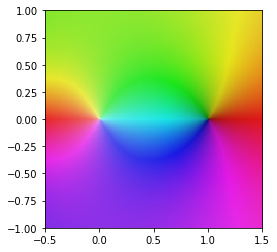

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from colorsys import hls_to_rgb

def colorize(z):
    '''
    Map a complex number to a color (or hue) and lightness.

    INPUT:
    z - an array of complex numbers in rectangular coordinates

    OUTPUT:
    If z is an n x m array, return an n x m x 3 array whose third axis encodes
    (hue, lightness, saturation) tuples for each entry in z. This new array can
    be plotted by plt.imshow().
    '''

    zy=np.flipud(z)
    r = np.abs(zy)
    arg = np.angle(zy)

    # Define hue (h), lightness (l), and saturation (s)
    # Saturation is constant in our visualizations
    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    # Convert the HLS values to RGB values.
    # This operation returns a tuple of shape (3,n,m).
    c = np.vectorize(hls_to_rgb) (h,l,s)

    # Convert c to an array and change the shape to (n,m,3)
    c = np.array(c)
    c = c.swapaxes(0,2)
    c = c.swapaxes(0,1)
    return c

f = lambda z :  (z**2-1)/z
x = np.linspace(-.5, 1.5, 401)
y = np.linspace(-1, 1, 401)
X,Y = np.meshgrid(x,y)
Z=f(X+Y*1j)
Zc=colorize(Z)
plt.imshow(Zc, extent=(-.5, 1.5, -1, 1))
plt.show()

# 14. The PageRank Algorithm

In [ ]:

A = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
              [ 1,  0,  0,  0,  0,  0,  0,  0],
              [ 0,  0,  0,  0,  0,  0,  0,  0],
              [ 1,  0,  1,  0,  0,  0,  1,  0],
              [ 1,  0,  0,  0,  0,  1,  1,  0],
              [ 1,  0,  0,  0,  0,  0,  1,  0],
              [ 1,  0,  0,  0,  0,  0,  0,  0],
              [ 1,  0,  0,  0,  0,  0,  0,  0]])

def to_matrix( filename, n ):
    ''' Return the nxn adjacency matrix described by the file.

    INPUTS:
    filename - Name of a .txt file describing a directed graph. Lines
            describing edges should have the form
        '<from node>\t<to node>'.
        The file may also include comments.
    n   - The number of nodes in the graph described by datafile

    RETURN:
    Return a NumPy array.
    '''

# Open `matrix.txt' for read-only
with open('./matrix.txt', 'r') as myfile:
    for line in myfile:
        print line

line = '0\t4\n'
# strip() removes trailing whitespace from a line.
# split() returns a list of the space-separated pieces of the line.
line.strip().split()

Am = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
               [ 1,  0,  0,  0,  0,  0,  0,  0],
               [ 1,  1,  1,  1,  1,  1,  1,  1],
               [ 1,  0,  1,  0,  0,  0,  1,  0],
               [ 1,  0,  0,  0,  0,  1,  1,  0],
               [ 1,  0,  0,  0,  0,  0,  1,  0],
               [ 1,  0,  0,  0,  0,  0,  0,  0],
               [ 1,  0,  0,  0,  0,  0,  0,  0]])

K = np.array([[ 0   ,  1   ,  1./8,  1./3,  1./3,  1./2,  1   ,  1   ],
              [ 0   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  1./3,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  0   ,  1./3,  0   ,  0   ,  0   ],
              [ 0   ,  0   ,  1./8,  1./3,  1./3,  1./2,  0   ,  0   ],
              [ 1   ,  0   ,  1./8,  0   ,  0   ,  0   ,  0   ,  0   ]])

from scipy import linalg as la
I = np.eye(8)
d = .85
la.solve(I-d*K, ((1-d)/8)*np.ones(8))

def iter_solve( adj, N=None, d=.85, tol=1E-5):
    '''
    Return the page ranks of the network described by 'adj' using the iterative method.

    INPUTS:
    adj - A NumPy array representing the adjacency matrix of a directed
            graph
    N     - Restrict the computation to the first `N` nodes of the graph.
            Defaults to N=None; in this case, the entire matrix is used.
    d     - The damping factor, a float between 0 and 1.
            Defaults to .85.
    tol  - Stop iterating when the change in approximations to the
            solution is less than `tol'. Defaults to 1E-5.

    OUTPUTS:
    Return the approximation to the steady state of p.
    '''

def eig_solve( adj, N=None, d=.85):
    '''
    Return the page ranks of the network described by `adj`.

    INPUTS:
    adj - A NumPy array representing the adjacency matrix of a directed
            graph
    N     - Restrict the computation to the first `N` nodes of the graph.
            Defaults to N=None; in this case, the entire matrix is used.
    d     - The damping factor, a float between 0 and 1.
            Defaults to .85.

    OUTPUTS:
    Return the approximation to the steady state of p.
    '''

with open('./ncaa2013.csv', 'r') as ncaafile:
    ncaafile.readline() #reads and ignores the header line
    for line in ncaafile:
        teams = line.strip().split(',') #split on commas
        print teams

edges = array([[ 0,  7],
[ 1,  0],
[ 3,  0],
[ 3,  6],
[ 4,  0],
[ 4,  5],
[ 4,  6],
[ 5,  0],
[ 5,  6],
[ 6,  0],
[ 7,  0]])

import networkx as nx
G = nx.from_edgelist(edges, create_using=nx.DiGraph())
G.in_degree()
G.out_degree()
G.in_edges(0)
G.out_edges(0)

nx.pagerank(G, alpha=0.85) # alpha is the dampening factor.


# 15. The Drazin Inverse

In [46]:
from scipy import linalg as la

# The standard Schur decomposition.
A = np.array([[0,0,2],[-3,2,6],[0,0,1]])
T,Z = la.schur(A)
T                       # The eigenvalues (2, 0, and 1) are not sorted.

array([[ 2., -3.,  6.],
       [ 0.,  0.,  2.],
       [ 0.,  0.,  1.]])

In [47]:
# Specify a sorting function to get the desired result.
f = lambda x: abs(x) > 0
T1,Z1,k = la.schur(A, sort=f)
T1

array([[2.        , 0.        , 6.70820393],
       [0.        , 1.        , 2.        ],
       [0.        , 0.        , 0.        ]])

In [48]:
k    # k is the number of columns satisfying the sort,
     # which is the number of nonzero eigenvalues.

2

In [49]:
A = np.random.randint(-9,9,(3,3))
A

array([[-5,  1,  2],
       [-9,  0, -5],
       [ 0, -5, -3]])

In [50]:
# Find the minimum value in the array.
minval = np.min(A)
minval

-9

In [51]:
# Find the location of the minimum value.
loc = np.where(A==minval)
loc

(array([1]), array([0]))

# 16. Iterative Solvers

In [ ]:
import numpy as np

D = np.array([[2,0],[0,16]])    # Let D be a diagonal matrix.
d = np.diag(D)                  # Extract the diagonal as a 1-D array.
x = np.random.random(2)
np.allclose(D.dot(x), d*x)

In [ ]:
% from scipy import linalg as la
%
% x = np.random.random(10)
% la.norm(x, <<ord>>=np.inf)          # Use la.norm() for ||x||.
% 0.74623726404168045
% np.<<max>>(np.<<abs>>(x))               # The equivalent in NumPy for ||x||.
% 0.74623726404168045
% 

In [ ]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.<<sum>>(np.<<abs>>(A[i])) + 1
    return A

x0 = np.random.random(5)        # Generate a random vector.
x1 = x0                         # Attempt to make a copy.
x1[3] = 1000                    # Modify the "copy" in place.
np.allclose(x0, x1)             # But x0 was also changed!

In [ ]:
# Instead, make a copy of x0 when creating x1.
x0 = np.copy(x1)                # Make a copy.
x1[3] = -1000
np.allclose(x0, x1)

In [ ]:
# Get the indices of where the i-th row of A starts and ends if the
# nonzero entries of A were flattened.
rowstart = A.indptr[i]
rowend = A.indptr[i+1]

# Multiply only the nonzero elements of the i-th row of A with the
# corresponding elements of x.
Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]

In [ ]:
from scipy import sparse

A = sparse.csr_matrix(diag_dom(50000))
b = np.random.random(50000)

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

n = 100
A,b = finite_difference(n)
x = sparse_sor(A,b,1.9,maxiters=10000,tol=10**-2)
U = x.reshape((n,n))
x,y = np.linspace(0,10,n), np.linspace(0,10,n)
X,Y = np.meshgrid(x,y)

plt.pcolormesh(X,Y,U,cmap='coolwarm')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

def jacobi(n=100, tol=1e-8):

    # Perform the algorithm, storing the result in the array 'U'.

    # Visualize the results.
    plt.imshow(U)
    plt.show()

# 17. The Arnoldi Iteration

In [ ]:
b = A.conj() @ B

In [ ]:
from scipy.sparse import linalg as spla
B = np.random.random((100,100))
spla.eigs(B, k=5, return_eigenvectors=false)

# Evaluate the eigenvalues
eigvalues = la.eig(A)[0]
# Sort them from greatest to least (use np.abs to account for complex parts)
eigvalues = eigvalues[np.sort(np.<<abs>>(eigvalues))[::-1]]

errors[errors > 10] = 10.

A = np.random.rand(300, 300)
plot_ritz(a, 10, 175)

# A matrix with uniformly distributed eigenvalues
d = np.diag(np.random.rand(300))
B = A @ d @ la.inv(A)
plot_ritz(B, 10, 175)

def companion_multiply(c, u):
    v = np.empty_like(u)
    v[0] = - c[0] * u[-1]
    v[1:] = u[:-1] - c[1:] * u[-1]
    return v

p = np.poly1d([1] + list(c[::-1]))
roots = p.roots
# Now sort by absolute value from largest to smallest
roots = roots[np.<<abs>>(roots).argsort()][::-1]

def lanczos(b, L, k, tol=1E-8):
    '''Perform `k' steps of the Lanczos iteration on the symmetric linear
    operator defined by `L', starting with the vector 'b'.

    INPUTS:
    b    - A NumPy array. The starting vector for the Lanczos iteration.
    L - A function handle. Should describe a symmetric linear operator.
    k    - Number of times to perform the Lanczos iteration.
    tol  - Stop iterating if the next vector in the Lanczos iteration has
          norm less than `tol'. Defaults to 1E-8.

    RETURN:
    Return (alpha, beta) where alpha and beta are the main diagonal and
    first subdiagonal of the tridiagonal matrix computed by the Lanczos
    iteration.
    '''

def tri_mul(a, b, u):
   ''' Return Au where A is the tridiagonal symmetric matrix with main
   diagonal a and subdiagonal b.
   '''
    v = a * u
    v[:-1] += b * u[1:]
    v[1:] += b * u[:-1]
    return v

# 18. GMRES

In [32]:
A = np.array([[1,0,0],[0,2,0],[0,0,3]])
b = np.array([1, 4, 6])
x0 = np.zeros(b.size)
gmres(A, b, x0, k=100, tol=1e-8)

NameError: name 'gmres' is not defined

In [ ]:
import numpy as np
from scipy import sparse
from scipy.sparse import linalg as spla

A = np.random.rand(300, 300)
b = np.random(300)
x, info = spla.gmres(A, b)
print(info)

In [ ]:
la.norm((A @ x) - b)

In [ ]:
# Restart after 1000 iterations.
x, info = spla.gmres(A, b, restart=1000)
info

In [ ]:
la.norm((A @ x) - b)

# Appendix

In [52]:
from joblib import Memory

ModuleNotFoundError: No module named 'joblib'